In [2]:
import homcloud.interface as hc
import numpy as np 
import matplotlib.pyplot as plt
import pyvista as pv
import dgl
import torch
from dtaidistance import dtw
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import scipy.stats as stats
import dionysus as d
from scipy.spatial import distance_matrix
from tqdm import tqdm

In [3]:
result = torch.load('./stat_explain/new_schnet_explain', map_location='cpu')
new_result = {}

for key in result.keys():
    node = result[key]
    node['edge_mask'] = node['edge_mask']
    node['sg'] = node['sg'].cpu()
    node['new_node_id'] = node['node_id']
    new_result[key.item()] = node

In [4]:
to_explain = 1501

In [5]:
edge_mask = new_result[1501]['edge_mask']


In [6]:
def node_info(node):
    node_info = {}
    pd = hc.PDList(f'./persistence_explain/homcloud_new/{node}.pdgm').dth_diagram(1)
    births = pd.births
    deaths = pd.deaths

    for b, d in tqdm(zip(births, deaths), total=len(births)):
        pair = pd.nearest_pair_to(b, d)
        optimal_cycle = pair.optimal_1_cycle()
        p = optimal_cycle.path_symbols()
        p = [(int(x[0]), int(x[1])) for x in p]
        for edge in p:
            if edge not in node_info.keys():
                node_info[edge] = [b, d]
            else:
                node_info[edge] += [b, d]
    
    torch.save(node_info, f'./persistence_explain/homcloud_new/alpha_info/{node}')
        

In [68]:
print(new_result[1501]['sg'].ndata['positions'])

tensor([[ -4.1566,  -8.3990, -15.3982],
        [ -1.3685,  -8.4298, -15.4729],
        [  7.7684,  -6.9879, -14.4545],
        ...,
        [ -0.2972,   7.6884,  16.3114],
        [  1.2945,  10.0128,  14.9626],
        [  2.4991,   7.6281,  15.2267]], dtype=torch.float64)


In [71]:
nodes = list(new_result.keys())[:50]
for node in nodes:
    print('*' * 20 + f' {node} ' + '*' * 20)
    node_info(node)

******************** 1501 ********************


100%|██████████| 6901/6901 [00:13<00:00, 504.91it/s]


******************** 1502 ********************


100%|██████████| 6945/6945 [00:13<00:00, 522.31it/s]


******************** 1166 ********************


100%|██████████| 6891/6891 [00:13<00:00, 529.01it/s]


******************** 1827 ********************


100%|██████████| 7041/7041 [00:13<00:00, 512.87it/s]


******************** 1499 ********************


100%|██████████| 6642/6642 [00:12<00:00, 547.98it/s]


******************** 1506 ********************


100%|██████████| 6950/6950 [00:13<00:00, 517.10it/s]


******************** 1825 ********************


100%|██████████| 6747/6747 [00:12<00:00, 527.57it/s]


******************** 1171 ********************


100%|██████████| 6788/6788 [00:12<00:00, 540.91it/s]


******************** 1824 ********************


100%|██████████| 6933/6933 [00:13<00:00, 523.58it/s]


******************** 1537 ********************


100%|██████████| 6873/6873 [00:13<00:00, 520.67it/s]


******************** 1464 ********************


100%|██████████| 6987/6987 [00:13<00:00, 527.28it/s]


******************** 1164 ********************


100%|██████████| 6784/6784 [00:12<00:00, 543.03it/s]


******************** 1169 ********************


100%|██████████| 6916/6916 [00:13<00:00, 521.79it/s]


******************** 1531 ********************


100%|██████████| 6861/6861 [00:12<00:00, 537.25it/s]


******************** 1497 ********************


100%|██████████| 6980/6980 [00:13<00:00, 531.30it/s]


******************** 1504 ********************


100%|██████████| 6895/6895 [00:13<00:00, 524.26it/s]


******************** 1536 ********************


100%|██████████| 6904/6904 [00:12<00:00, 532.25it/s]


******************** 1792 ********************


100%|██████████| 6613/6613 [00:11<00:00, 560.21it/s]


******************** 1135 ********************


100%|██████████| 6912/6912 [00:13<00:00, 500.41it/s]


******************** 1136 ********************


100%|██████████| 6834/6834 [00:12<00:00, 534.87it/s]


******************** 1534 ********************


100%|██████████| 6603/6603 [00:11<00:00, 555.31it/s]


******************** 1465 ********************


100%|██████████| 6839/6839 [00:12<00:00, 528.65it/s]


******************** 1468 ********************


100%|██████████| 6746/6746 [00:12<00:00, 545.53it/s]


******************** 1863 ********************


100%|██████████| 6582/6582 [00:11<00:00, 563.74it/s]


******************** 1503 ********************


100%|██████████| 6755/6755 [00:12<00:00, 537.41it/s]


******************** 1822 ********************


100%|██████████| 6605/6605 [00:11<00:00, 570.29it/s]


******************** 1161 ********************


100%|██████████| 6971/6971 [00:13<00:00, 521.58it/s]


******************** 1462 ********************


100%|██████████| 6687/6687 [00:12<00:00, 546.98it/s]


******************** 1791 ********************


100%|██████████| 6840/6840 [00:12<00:00, 547.74it/s]


******************** 1167 ********************


100%|██████████| 6772/6772 [00:12<00:00, 553.08it/s]


******************** 1826 ********************


100%|██████████| 6784/6784 [00:12<00:00, 545.98it/s]


******************** 1173 ********************


100%|██████████| 6679/6679 [00:11<00:00, 559.10it/s]


******************** 1861 ********************


100%|██████████| 6812/6812 [00:12<00:00, 551.53it/s]


******************** 1859 ********************


100%|██████████| 6820/6820 [00:12<00:00, 527.54it/s]


******************** 1831 ********************


100%|██████████| 6591/6591 [00:12<00:00, 548.17it/s]


******************** 1168 ********************


100%|██████████| 6686/6686 [00:12<00:00, 543.87it/s]


******************** 1165 ********************


100%|██████████| 6749/6749 [00:12<00:00, 541.21it/s]


******************** 1208 ********************


100%|██████████| 6614/6614 [00:12<00:00, 541.76it/s]


******************** 1819 ********************


100%|██████████| 6894/6894 [00:12<00:00, 536.35it/s]


******************** 1541 ********************


100%|██████████| 6667/6667 [00:12<00:00, 548.24it/s]


******************** 1500 ********************


100%|██████████| 6615/6615 [00:12<00:00, 546.63it/s]


******************** 1469 ********************


100%|██████████| 6839/6839 [00:12<00:00, 533.24it/s]


******************** 1828 ********************


100%|██████████| 6806/6806 [00:12<00:00, 536.01it/s]


******************** 1498 ********************


100%|██████████| 6601/6601 [00:12<00:00, 543.88it/s]


******************** 1535 ********************


100%|██████████| 6723/6723 [00:12<00:00, 524.56it/s]


******************** 1463 ********************


100%|██████████| 6682/6682 [00:12<00:00, 545.16it/s]


******************** 1794 ********************


100%|██████████| 6692/6692 [00:12<00:00, 533.57it/s]


******************** 1170 ********************


100%|██████████| 6762/6762 [00:12<00:00, 537.94it/s]


******************** 1789 ********************


100%|██████████| 6621/6621 [00:12<00:00, 541.83it/s]


******************** 1203 ********************


100%|██████████| 6764/6764 [00:12<00:00, 528.45it/s]


In [70]:
nodes = list(new_result.keys())[:50]
for node in nodes:
    print('*' * 20 + f' {node} ' + '*' * 20)
    hc.PDList.from_alpha_filtration(new_result[node]['sg'].ndata['positions'].numpy(), 
                                    save_to=f'./persistence_explain/homcloud_new/{node}.pdgm',
                                    save_boundary_map=True)

******************** 1501 ********************
******************** 1502 ********************
******************** 1166 ********************
******************** 1827 ********************
******************** 1499 ********************
******************** 1506 ********************
******************** 1825 ********************
******************** 1171 ********************
******************** 1824 ********************
******************** 1537 ********************
******************** 1464 ********************
******************** 1164 ********************
******************** 1169 ********************
******************** 1531 ********************
******************** 1497 ********************
******************** 1504 ********************
******************** 1536 ********************
******************** 1792 ********************
******************** 1135 ********************
******************** 1136 ********************
******************** 1534 ********************
*************

In [7]:
pd1 = hc.PDList(f'./persistence_explain/homcloud/{to_explain}.pdgm').dth_diagram(1)
pd1

PD(path=./persistence_explain/homcloud/1501.pdgm, d=1)

In [8]:
pd1.births

array([1.52122389, 1.62800509, 1.55254041, ..., 6.45546668, 6.98004531,
       6.97299475])

In [9]:
def find_nodes(g, edges):
    src_nodes, dst_nodes = g.find_edges(edges.copy())
    return np.unique(np.concatenate((src_nodes.numpy(), dst_nodes.numpy())))

def find_lengths(to_explain, mode='high'):
    persistence = torch.load(f'./persistence_explain/homcloud/alpha_info/{to_explain}')
    g = result[to_explain]['sg']
    edge_mask = result[to_explain]['edge_mask'].numpy()
    
    if mode == 'high':
        selected_edges = np.flip(np.argsort(edge_mask))[:10]
    elif mode == 'mid':
        selected_edges = np.flip(np.argsort(edge_mask))[len(edge_mask) // 2 - 5 : len(edge_mask) // 2 + 5]
    elif mode == 'low':
        selected_edges = np.flip(np.argsort(edge_mask))[-10:]
    elif mode == 'random':
        selected_edges = np.random.choice(np.flip(np.argsort(edge_mask)), 10)
        
    src_nodes, dst_nodes = g.find_edges(selected_edges.copy())
    src_nodes = src_nodes.numpy()
    dst_nodes = dst_nodes.numpy()
    edges_to_investigate = np.array(list(zip(src_nodes, dst_nodes)))
    edges_to_investigate = [tuple(sorted(it)) for it in edges_to_investigate]
    lengths = []
    for edge in edges_to_investigate:
        if edge in persistence.keys():
            lengths.append(len(persistence[edge]) // 2)
        else:
            lengths.append(0)
    
    return lengths

[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 5, 0, 5, 1, 1, 0, 12, 10, 8, 0, 0, 3, 0, 0, 4, 6, 4, 0, 3, 0, 0, 0, 2, 5, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 1, 0, 0, 0, 5, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 7, 1, 0, 0, 0, 0, 0, 0, 5, 1, 4, 0, 3, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 2, 1, 0, 0, 8, 3, 1, 0, 8, 2, 4, 0, 5, 8, 0, 0, 4, 0, 0, 0, 3, 9, 1, 0, 0, 1, 2, 0, 3, 0, 5, 7, 5, 5, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 4, 2, 0, 0, 4, 0, 7, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 4, 0, 0, 1, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 2, 0, 1, 2, 8, 6, 4, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 6, 1, 0, 1, 0, 0, 0, 0, 1, 0, 10, 0, 0, 3, 3, 0, 0, 5, 0, 1, 0, 1, 0, 5, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 6, 0, 1, 0, 1, 3, 0, 0, 5, 0, 0, 9, 5, 1, 5, 0, 0, 0, 2, 0, 3, 2, 0, 2, 3, 0, 3, 2, 1, 

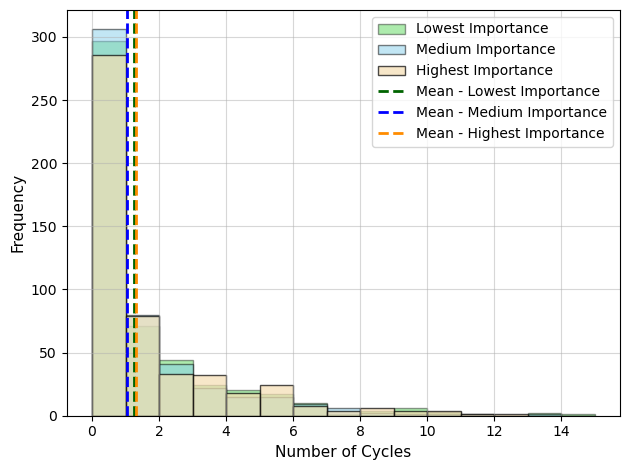

In [10]:
nodes = list(result.keys())[:50]

# Add random

high_lengths = []
mid_lengths = []
low_lengths = []
random_lengths = []
for to_explain in nodes:
    high_lengths += find_lengths(to_explain, mode='high')
    mid_lengths += find_lengths(to_explain, mode='mid')
    low_lengths += find_lengths(to_explain, mode='low')
    random_lengths += find_lengths(to_explain, mode='random')
    
print(high_lengths, mid_lengths, low_lengths, random_lengths)

min_len = min(min(high_lengths), min(mid_lengths), min(low_lengths), min(random_lengths))
max_len = max(max(high_lengths), max(mid_lengths), max(low_lengths), max(random_lengths))

plt.hist(low_lengths, bins=15, range=(min_len, max_len), color='limegreen', alpha=0.4, label='Lowest Importance', edgecolor='black')
plt.hist(mid_lengths, bins=15, range=(min_len, max_len), color='skyblue', alpha=0.5, label='Medium Importance', edgecolor='black')
plt.hist(high_lengths, bins=15, range=(min_len, max_len), color='wheat', alpha=0.7, label='Highest Importance', edgecolor='black')
# plt.hist(random_lengths, bins=15, range=(min_len, max_len), color='skyblue', alpha=0.5, label='Random Importance', edgecolor='black', linestyle='--')
# plt.hist(high_lengths, bins=100, range=(min_len, max_len), color='orange', edgecolor='black', histtype='step', linewidth=2)

mean_low = sum(low_lengths) / len(low_lengths)
mean_mid = sum(mid_lengths) / len(mid_lengths)
mean_high = sum(high_lengths) / len(high_lengths)
mean_rand = sum(random_lengths) / len(random_lengths)

print(mean_low, mean_mid, mean_high, mean_rand)

plt.axvline(mean_low, color='darkgreen', linestyle='dashed', linewidth=2, label='Mean - Lowest Importance')
plt.axvline(mean_mid, color='blue', linestyle='dashed', linewidth=2, label='Mean - Medium Importance')
plt.axvline(mean_high, color='darkorange', linestyle='dashed', linewidth=2, label='Mean - Highest Importance')
# plt.axvline(mean_rand, color='darkblue', linestyle='dashed', linewidth=2, label='Mean - Random')

plt.xlabel('Number of Cycles', fontdict={'size':11})
plt.ylabel('Frequency', fontdict={'size':11})
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('schnet_high_mid_low.png', dpi=300)

In [49]:
to_explain = 1501

In [22]:
def identify_nodes_at_birth(rips, birth_index):
    birth_simplex = rips[birth_index]
    nodes = list(birth_simplex)
    return nodes, birth_index

def del_other(graph, nodes):
    deleted = {}
    for vertex in graph.keys():
        if vertex not in nodes:
            continue
        else:
            neighbors = [node for node in graph[vertex] if node in nodes]
            deleted[vertex] = neighbors
    return deleted

def find_cycle(graph):
    start = list(graph.keys())[0]
    visited = [start]
    cycle = []
    
    while len(visited) != len(graph.keys()):
        curr = visited[-1]
        neighbors = graph[curr]
        if len(neighbors) != 2:
            raise ValueError
        
        if neighbors[0] not in visited:
            cycle.append(tuple(sorted([curr, neighbors[0]])))
            visited.append(neighbors[0])
            curr = neighbors[0]
        else:
            cycle.append(tuple(sorted([curr, neighbors[1]])))
            visited.append(neighbors[1])
            curr = neighbors[1]
    
    cycle.append(tuple(sorted([start, visited[-1]])))
    return cycle
        
g = result[to_explain]['sg']
pos = g.ndata['position'].numpy()
f = d.fill_rips(pos, 2, 5)
persistence_diagrams = d.homology_persistence(f)
dgms = d.init_diagrams(persistence_diagrams, f)
pd1 = hc.PDList(f'./persistence_explain/homecloud/rips/{to_explain}_rips.pdgm').dth_diagram(1)
cycle_info = {}
cannot_calculate = 0

for i, pt in enumerate(tqdm(dgms[1])):
    if i < 1245:
        continue
    birth = pt.birth
    death = pt.death
    
    if birth == death:
        continue
    
    birth_index = pt.data
    nodes, index = identify_nodes_at_birth(f, birth_index)
    
    graph = {}
    for i in range(index + 1):
        if len(list(f[i])) == 2:  
            u, v = list(f[i])
            if u not in graph:
                graph[u] = []
            if v not in graph:
                graph[v] = []
            graph[u].append(v)
            graph[v].append(u)
            
    pair = pd1.nearest_pair_to(birth, death)
    
    try:
        optimal_cycle = pair.optimal_1_cycle()
    except RuntimeError:
        cannot_calculate += 1
        continue
        
    p = optimal_cycle.boundary_points()
    # cycle = [tuple(sorted([p[i], p[i+1]])) for i in range(len(p) - 1)]
    # cycle.append(tuple(sorted([p[-1], p[0]])))
    # print(cycle)
    subgraph = del_other(graph, p)
    cycle = find_cycle(subgraph)
    
    for edge in cycle:
        if edge not in cycle_info.keys():
            cycle_info[edge] = [birth, death]
        else:
            cycle_info[edge] += [birth, death]
            
    torch.save(cycle_info, f'persistence_explain/homecloud/rips_cycle_info/{to_explain}_again')
    

100%|██████████| 1492/1492 [42:58<00:00,  1.73s/it] 


In [33]:
res = torch.load('persistence_explain/homecloud/rips_cycle_info/1501')
len(res)

2973

In [34]:
res_again = torch.load('persistence_explain/homecloud/rips_cycle_info/1501_again')
len(res_again)

921

In [35]:
persistence = res
for key in res_again.keys():
    if key in persistence:
        persistence[key] += res_again[key]
    else:
        persistence[key] = res_again[key]
        
len(persistence)

3451

In [14]:
result = torch.load('./stat_explain/300_node_explain', map_location='cpu')

for key in result.keys():
    node = result[key]
    node['edge_mask'] = node['edge_mask']
    node['sg'] = node['sg'].cpu()
    node['new_node_id'] = node['new_node_id']
    result[key] = node

In [15]:
g = result[to_explain]['sg']
edge_mask = result[to_explain]['edge_mask']
selected_edges = np.flip(np.argsort(edge_mask))[:10]
selected_edges

array([25215, 14729, 22884, 15695, 21972, 24961, 15780, 26277, 14710,
       15788])

In [16]:
src_nodes, dst_nodes = g.find_edges(selected_edges.copy())
src_nodes = src_nodes.numpy()
dst_nodes = dst_nodes.numpy()
edges_to_investigate = np.array(list(zip(src_nodes, dst_nodes)))
edges_to_investigate = [tuple(sorted(it)) for it in edges_to_investigate]
edges_to_investigate 

[(892, 892),
 (546, 546),
 (816, 818),
 (576, 577),
 (546, 788),
 (884, 923),
 (546, 579),
 (892, 929),
 (545, 546),
 (576, 579)]

In [19]:
persistence = torch.load(f'./persistence_explain/homecloud/alpha_info/{to_explain}')
persistence

{(652, 657): [1.5212238861,
  1.9131343427549758,
  1.6343089214749997,
  2.067683012307548,
  1.7347330210250003,
  2.3100167767398143,
  2.5681102574000008,
  2.692025009066891,
  1.7725841117558907,
  3.008603499747933,
  3.1835730091499994,
  3.192433015001673],
 (654, 657): [1.5212238861,
  1.9131343427549758,
  1.7409371021500002,
  2.1351300427125177],
 (652, 654): [1.5212238861,
  1.9131343427549758,
  2.07206647895,
  2.2610367024167717,
  1.7453633763500003,
  2.4022180249630383,
  1.6944387832499999,
  2.569885864584594],
 (1122, 1123): [1.6280050871500007,
  1.9607186635040965,
  1.7453238014249992,
  2.090239482444689,
  1.9201689444750007,
  2.410286835791322,
  1.6528522774000005,
  2.6621168976202116,
  1.5856315808749997,
  2.7230520807959278,
  1.6116134912500009,
  2.8724397195931273,
  1.6452465537249992,
  3.006617167864244],
 (1123, 1125): [1.6280050871500007,
  1.9607186635040965,
  2.358864382025001,
  2.644611418402568],
 (1122, 1125): [1.6280050871500007,
  1.

In [50]:
edges = [key for key in list(persistence.keys()) if g.has_edges_between(key[0], key[1])]
len(edges)

8207

In [53]:
edges = [g.edge_ids(x[0], x[1]) for x in edges]

In [51]:
len(edge_mask)

40823

In [67]:
importance = [edge_mask[edge] for edge in edges]
importance

[0.0017513210186734796,
 0.001751692034304142,
 0.0017613801173865795,
 0.0017566810129210353,
 0.0017701201140880585,
 0.0017972259083762765,
 0.0017764947842806578,
 0.0018498544814065099,
 0.0018462463049218059,
 0.001804397557862103,
 0.001822170801460743,
 0.001774403965100646,
 0.0017864028923213482,
 0.0017520638648420572,
 0.0017680216114968061,
 0.002306816866621375,
 0.004015372134745121,
 0.003922201227396727,
 0.0026304875500500202,
 0.0025553444866091013,
 0.004130269400775433,
 0.0017666320782154799,
 0.001772735733538866,
 0.0017415473703294992,
 0.001776195247657597,
 0.001777318655513227,
 0.0017649275250732899,
 0.001772162038832903,
 0.0017470545135438442,
 0.0018116012215614319,
 0.001711113378405571,
 0.0018011762294918299,
 0.0017675724811851978,
 0.0029540813993662596,
 0.021303415298461914,
 0.019611358642578125,
 0.0031432423274964094,
 0.15335138142108917,
 0.1509762704372406,
 0.0017368689877912402,
 0.0017528864555060863,
 0.0017571267671883106,
 0.001744685

In [68]:
again = [edge_mask[e] for e in range(len(edge_mask)) if e not in edges]

In [69]:
np.mean(importance)

0.018170386336079866

In [70]:
np.mean(edge_mask)

0.0141341209939039

In [71]:
np.mean(again)

0.013118495850929956

In [43]:
length = [len(persistence[key]) for key in list(persistence.keys()) if g.has_edges_between(key[0], key[1])]

In [45]:
index = [g.edge_ids(x[0], x[1]) for x in list(persistence.keys()) if g.has_edges_between(x[0], x[1])]
importance = [edge_mask[ind] for ind in index]

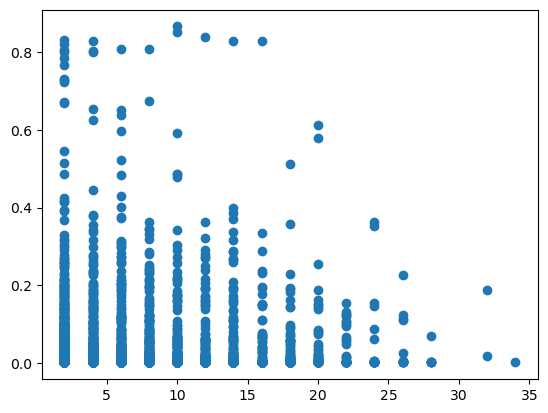

In [48]:
plt.scatter(length, importance)

In [35]:
sorted_keys = list(reversed(sorted(persistence, key=lambda k: len(persistence[k]))))
sorted_keys

[(161, 163),
 (323, 563),
 (850, 1072),
 (1112, 1113),
 (1264, 1287),
 (587, 623),
 (757, 759),
 (1220, 1244),
 (1103, 1106),
 (860, 894),
 (222, 436),
 (386, 633),
 (557, 559),
 (784, 1011),
 (1096, 1102),
 (1215, 1220),
 (986, 1017),
 (218, 220),
 (1237, 1238),
 (852, 888),
 (335, 339),
 (1056, 1244),
 (829, 1024),
 (979, 984),
 (874, 911),
 (1147, 1342),
 (954, 957),
 (400, 436),
 (500, 746),
 (681, 684),
 (792, 1021),
 (666, 911),
 (808, 811),
 (274, 276),
 (696, 697),
 (752, 755),
 (855, 1076),
 (163, 188),
 (774, 808),
 (398, 400),
 (1008, 1011),
 (618, 652),
 (755, 758),
 (1228, 1233),
 (115, 116),
 (1017, 1188),
 (563, 564),
 (329, 570),
 (173, 177),
 (1053, 1244),
 (1202, 1228),
 (615, 857),
 (1150, 1170),
 (1264, 1392),
 (567, 570),
 (143, 169),
 (708, 951),
 (844, 845),
 (436, 438),
 (162, 327),
 (1258, 1259),
 (66, 69),
 (1103, 1138),
 (911, 913),
 (894, 1118),
 (635, 874),
 (845, 1102),
 (1384, 1408),
 (761, 988),
 (275, 276),
 (1056, 1086),
 (1111, 1113),
 (303, 304),
 (8

In [36]:
edge_ids = [g.edge_ids(x[0], x[1]) for x in sorted_keys if g.has_edges_between(x[0], x[1])]
edge_ids

[3904,
 8315,
 23883,
 31635,
 35957,
 16063,
 21030,
 34652,
 31340,
 24237,
 5686,
 10289,
 15060,
 21852,
 31109,
 34540,
 27766,
 5564,
 35141,
 23945,
 8717,
 29912,
 23256,
 27537,
 24652,
 32679,
 27004,
 10733,
 13311,
 18948,
 22134,
 18458,
 22576,
 6880,
 19331,
 20858,
 24065,
 3974,
 21515,
 10668,
 28350,
 17035,
 20952,
 34838,
 2590,
 28651,
 15258,
 8527,
 4282,
 29820,
 34104,
 16933,
 32776,
 35969,
 15388,
 3400,
 19742,
 23676,
 11744,
 3942,
 35750,
 1549,
 31344,
 25709,
 25297,
 17527,
 23717,
 39238,
 21173,
 6910,
 29908,
 31605,
 7732,
 22477,
 17458,
 31393,
 11290,
 10449,
 34505,
 21847,
 13199,
 16571,
 28784,
 23845,
 3778,
 1561,
 38877,
 10288,
 30404,
 30745,
 20696,
 16024,
 11646,
 4192,
 11780,
 19042,
 14331,
 4293,
 39230,
 10873,
 1529,
 30814,
 34272,
 9117,
 4809,
 15889,
 10920,
 3261,
 14608,
 5146,
 8795,
 21291,
 14874,
 12231,
 8862,
 15292,
 36178,
 36172,
 11329,
 3264,
 17375,
 30106,
 33953,
 12932,
 12906,
 21735,
 9220,
 3522,
 5302

In [37]:
edge_index = np.flip(np.argsort(edge_mask))
edge_index

array([25215, 14729, 22884, ..., 13646, 10690, 11828])

In [38]:
ind = [np.where(edge_index == id)[0][0] for id in edge_ids]
ind

[10409,
 4636,
 697,
 13810,
 9212,
 36461,
 10964,
 15363,
 1918,
 9991,
 16800,
 3626,
 7900,
 1330,
 1284,
 26478,
 31913,
 22692,
 7831,
 520,
 1173,
 27952,
 35777,
 10336,
 8224,
 29796,
 38162,
 17826,
 20054,
 34731,
 10352,
 8247,
 7762,
 23031,
 27250,
 12705,
 968,
 28442,
 23540,
 9639,
 1609,
 31827,
 14990,
 10551,
 38865,
 31879,
 2129,
 210,
 36858,
 30395,
 9960,
 915,
 12554,
 17440,
 219,
 34048,
 34281,
 1524,
 39943,
 2272,
 4395,
 16765,
 1442,
 16268,
 13833,
 5006,
 1187,
 38711,
 25343,
 19088,
 33505,
 13658,
 28911,
 24970,
 2464,
 1373,
 36067,
 9566,
 17867,
 17398,
 22297,
 922,
 12529,
 1360,
 10089,
 22035,
 39263,
 12543,
 1103,
 35391,
 13668,
 16116,
 39125,
 16525,
 35662,
 23704,
 5124,
 11853,
 23628,
 10944,
 25018,
 30768,
 16281,
 35815,
 40115,
 9563,
 2118,
 1966,
 9826,
 29313,
 1163,
 10547,
 10665,
 24367,
 11735,
 1211,
 35961,
 10072,
 36695,
 9947,
 8244,
 8579,
 18631,
 20363,
 28981,
 979,
 8095,
 24391,
 30628,
 31083,
 12123,
 26581,

In [41]:
stats.pearsonr(np.flip(ind), np.flip(np.arange(len(ind))))

(0.055230370652400905, 5.542396765819054e-07)

In [29]:
list(reversed(sorted(edge_mask)))


[0.945032000541687,
 0.8944020867347717,
 0.8740527033805847,
 0.8666550517082214,
 0.8566088080406189,
 0.8520597815513611,
 0.8467414379119873,
 0.8455844521522522,
 0.8405009508132935,
 0.8361179828643799,
 0.8350607752799988,
 0.8347890377044678,
 0.8338623642921448,
 0.8337300419807434,
 0.830590546131134,
 0.8302695155143738,
 0.8293111324310303,
 0.8287342190742493,
 0.8245526552200317,
 0.8223763704299927,
 0.8196009993553162,
 0.8186395764350891,
 0.8089319467544556,
 0.808619499206543,
 0.8057245016098022,
 0.8052991032600403,
 0.8024141192436218,
 0.8015349507331848,
 0.8012371063232422,
 0.8011437654495239,
 0.7996613383293152,
 0.7945495843887329,
 0.7930472493171692,
 0.7894183993339539,
 0.7883903980255127,
 0.7871896624565125,
 0.7858531475067139,
 0.785161554813385,
 0.7666662335395813,
 0.7455443739891052,
 0.7424759864807129,
 0.7305501699447632,
 0.7293919324874878,
 0.7271354794502258,
 0.7231589555740356,
 0.7206815481185913,
 0.7193701267242432,
 0.71856546401977

In [25]:
importance = [edge_mask[edge_id] for edge_id in edge_ids]
importance

[0.0017461159732192755,
 0.0017346671083942056,
 0.0017308315727859735,
 0.05133207514882088,
 0.006047527771443129,
 0.0017596151446923614,
 0.001719843945465982,
 0.0018256353214383125,
 0.1155610978603363,
 0.0017685359343886375,
 0.0017800353234633803,
 0.0017502676928415895,
 0.0017816449981182814,
 0.0017448730068281293,
 0.0017198577988892794,
 0.001802451559342444,
 0.0017468766309320927,
 0.0024809453170746565,
 0.0017629702342674136,
 0.0017825899412855506,
 0.0017329941038042307,
 0.0017202359158545732,
 0.0017906108405441046,
 0.0017675647977739573,
 0.003711366094648838,
 0.0017564576119184494,
 0.0017472077161073685,
 0.12162970006465912,
 0.0017530933255329728,
 0.0017897265497595072,
 0.09632792323827744,
 0.0017383205704391003,
 0.01265820860862732,
 0.002446334809064865,
 0.002052556723356247,
 0.0017712091794237494,
 0.13066060841083527,
 0.060805726796388626,
 0.0017289707902818918,
 0.0017291088588535786,
 0.0018040325958281755,
 0.0017580713611096144,
 0.072555899

In [44]:
length = [len(v) for v in persistence.values()]
np.mean(length)

4.829324833381628

In [45]:
np.max(length)

24

In [39]:
temp = []
for edge in edges_to_investigate:
    if edge in persistence.keys():
        temp.append(edge)
        
edges_to_investigate = temp

In [40]:
edges_to_investigate

[(952, 1160), (952, 1165), (952, 984), (949, 952)]

In [41]:
avg_cycle = np.mean([len(np.unique(np.sort(persistence[key]))) for key in persistence.keys()])
avg_cycle

4.794842074760939

In [42]:
selected_cycles = []
for key in edges_to_investigate:
    if key in persistence.keys():
        selected_cycles.append(len(persistence[key]))
    # else:
    #     selected_cycles.append(0)
        
avg_selected_cycle = np.mean(selected_cycles)
avg_selected_cycle

3.0